# Final Project Part II

## Loading Libraries

In [ ]:
import numpy as np
import pandas as pd
import math
from sklearn import cluster
import matplotlib.pyplot as plt
%matplotlib inline
from scipy.cluster import hierarchy
from sklearn.cluster import DBSCAN, k_means, KMeans
from sklearn.preprocessing import StandardScaler, normalize
from sklearn.preprocessing import MinMaxScaler
from sklearn.decomposition import PCA
import seaborn as sns
from sklearn.metrics import silhouette_score
from sklearn import metrics
from sklearn.metrics import adjusted_rand_score


## Loading the Dataset

In [ ]:
# Loading the OSA dataset

ehr_data = pd.read_csv('http://pluto.hood.edu/~dong/datasets/osa_hf.csv',header='infer')
ehr_data.head()

,bmi,hospital_expire_flag,los,age,charlson,"Calculated Bicarbonate, Whole Blood",Calculated Total CO2,"Chloride, Whole Blood",Free Calcium,Glucose,...,insurance_Medicare,insurance_Other,admission_type_DIRECT EMER.,admission_type_DIRECT OBSERVATION,admission_type_ELECTIVE,admission_type_EU OBSERVATION,admission_type_EW EMER.,admission_type_OBSERVATION ADMIT,admission_type_SURGICAL SAME DAY ADMISSION,admission_type_URGENT
0,0.217430,0,0.902069,0.611765,0.45,0.0,0.068493,0.090909,0.564516,0.103448,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
1,0.253176,0,0.117953,0.670588,0.25,0.0,0.000000,0.000000,0.000000,0.000000,...,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
2,0.255539,0,0.125375,0.541176,0.35,0.0,0.000000,0.000000,0.000000,0.000000,...,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
3,0.124372,0,0.236605,0.294118,0.50,0.0,0.013699,0.000000,0.000000,0.000000,...,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
4,0.188183,0,0.404237,0.635294,0.35,0.0,0.000000,0.000000,0.000000,0.000000,...,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0


### Summarizing Dataset

In [ ]:
# Count number of instances and features
print('Number of instances = %d' % (ehr_data.shape[0]))
print('Number of attributes = %d' % (ehr_data.shape[1]))

Number of instances = 10841
Number of attributes = 764


In [ ]:
print(ehr_data.columns)

Index(['bmi', 'hospital_expire_flag', 'los', 'age', 'charlson',
       'Calculated Bicarbonate, Whole Blood', 'Calculated Total CO2',
       'Chloride, Whole Blood', 'Free Calcium', 'Glucose',
       ...
       'insurance_Medicare', 'insurance_Other', 'admission_type_DIRECT EMER.',
       'admission_type_DIRECT OBSERVATION', 'admission_type_ELECTIVE',
       'admission_type_EU OBSERVATION', 'admission_type_EW EMER.',
       'admission_type_OBSERVATION ADMIT',
       'admission_type_SURGICAL SAME DAY ADMISSION', 'admission_type_URGENT'],
      dtype='object', length=764)


## Data Preprocessing

### Data Cleaning

In [ ]:
# Checking for Missing Values

ehr_data = ehr_data.replace('?',np.NaN)

print('Number of missing values by column:')
print(ehr_data.isna().sum())

print("\nTotal number of missing values = %d" % (ehr_data.isna().sum().sum()))

print('\nNumber of instances = %d' % (ehr_data.shape[0]))
print('Number of attributes = %d' % (ehr_data.shape[1]))


Number of missing values by column:
bmi                                           0
hospital_expire_flag                          0
los                                           0
age                                           0
charlson                                      0
                                             ..
admission_type_EU OBSERVATION                 0
admission_type_EW EMER.                       0
admission_type_OBSERVATION ADMIT              0
admission_type_SURGICAL SAME DAY ADMISSION    0
admission_type_URGENT                         0
Length: 764, dtype: int64

Total number of missing values = 0

Number of instances = 10841
Number of attributes = 764


In [ ]:
#Checking for outliers by computing Z-score for each attribute

Z = (ehr_data-ehr_data.mean())/ehr_data.std()
Z[20:25]

,bmi,hospital_expire_flag,los,age,charlson,"Calculated Bicarbonate, Whole Blood",Calculated Total CO2,"Chloride, Whole Blood",Free Calcium,Glucose,...,insurance_Medicare,insurance_Other,admission_type_DIRECT EMER.,admission_type_DIRECT OBSERVATION,admission_type_ELECTIVE,admission_type_EU OBSERVATION,admission_type_EW EMER.,admission_type_OBSERVATION ADMIT,admission_type_SURGICAL SAME DAY ADMISSION,admission_type_URGENT
20,0.227985,-0.156439,-0.066017,1.011135,0.008764,-0.064559,-0.215036,-0.138289,-0.186039,-0.188784,...,-1.117194,1.238303,-0.233376,-0.184523,-0.158897,-0.284152,1.171138,-0.510305,-0.319108,-0.302876
21,-1.270089,6.391664,0.398375,1.563693,0.008764,-0.064559,-0.215036,-0.138289,-0.186039,-0.188784,...,0.895017,-0.807482,-0.233376,-0.184523,-0.158897,-0.284152,-0.853791,1.959433,-0.319108,-0.302876
22,-0.453974,-0.156439,-0.737712,1.149274,0.350530,-0.064559,-0.215036,-0.138289,-0.186039,-0.188784,...,0.895017,-0.807482,-0.233376,-0.184523,-0.158897,3.518921,-0.853791,-0.510305,-0.319108,-0.302876
23,1.452157,-0.156439,-0.582754,-1.060957,-1.700068,-0.064559,-0.215036,-0.138289,-0.186039,-0.188784,...,-1.117194,1.238303,-0.233376,-0.184523,-0.158897,-0.284152,-0.853791,1.959433,-0.319108,-0.302876
24,-0.951469,-0.156439,-0.796758,-0.024911,0.692297,-0.064559,-0.215036,-0.138289,-0.186039,-0.188784,...,0.895017,-0.807482,-0.233376,-0.184523,6.292801,-0.284152,-0.853791,-0.510305,-0.319108,-0.302876


In [ ]:
print('Number of rows before discarding outliers = %d' % (Z.shape[0]))
#Z.fillna(Z.median(),inplace=True)
Z2 = Z.loc[((Z > -3).sum(axis=1)==9) & ((Z <= 3).sum(axis=1)==9),:]
print('Number of rows after discarding missing values = %d' % (Z2.shape[0]))

Number of rows before discarding outliers = 10841
Number of rows after discarding missing values = 0


In [ ]:
# step-by-step explanation
Z[((Z > -3).sum(axis=1) == 9)].shape[0]
Z[((Z > -3).sum(axis=1) == 9) & ((Z <= 3).sum(axis=1) == 9)].shape[0]

0

In [ ]:
# Checking for duplicates

duplicates = ehr_data.duplicated()
print('Number of duplicate rows = %d' % (duplicates.sum()))
ehr_data.loc[[11,28]]

Number of duplicate rows = 0


,bmi,hospital_expire_flag,los,age,charlson,"Calculated Bicarbonate, Whole Blood",Calculated Total CO2,"Chloride, Whole Blood",Free Calcium,Glucose,...,insurance_Medicare,insurance_Other,admission_type_DIRECT EMER.,admission_type_DIRECT OBSERVATION,admission_type_ELECTIVE,admission_type_EU OBSERVATION,admission_type_EW EMER.,admission_type_OBSERVATION ADMIT,admission_type_SURGICAL SAME DAY ADMISSION,admission_type_URGENT
11,0.194682,0,0.708332,0.600000,0.15,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
28,0.148006,0,0.185967,0.611765,0.25,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0


### Dimension Reduction Using Principal Component Analysis (PCA)

In [ ]:
#Standarizing the ehr dataset
scaler = StandardScaler()
ehr_data_scaled = scaler.fit_transform(ehr_data)

# Create a new DataFrame from the scaled data
ehr_data_scaled = pd.DataFrame(ehr_data_scaled, columns=ehr_data.columns)

ehr_data_scaled.head()

,bmi,hospital_expire_flag,los,age,charlson,"Calculated Bicarbonate, Whole Blood",Calculated Total CO2,"Chloride, Whole Blood",Free Calcium,Glucose,...,insurance_Medicare,insurance_Other,admission_type_DIRECT EMER.,admission_type_DIRECT OBSERVATION,admission_type_ELECTIVE,admission_type_EU OBSERVATION,admission_type_EW EMER.,admission_type_OBSERVATION ADMIT,admission_type_SURGICAL SAME DAY ADMISSION,admission_type_URGENT
0,0.792594,-0.156447,3.725420,0.044161,1.034111,-0.064562,2.179486,3.018037,19.902973,4.313845,...,0.895059,-0.80752,-0.233387,-0.184532,-0.158904,-0.284165,-0.853831,1.959523,-0.319123,-0.30289
1,1.468995,-0.156447,-0.574482,0.389525,-0.333018,-0.064562,-0.215046,-0.138295,-0.186047,-0.188792,...,0.895059,-0.80752,-0.233387,-0.184532,-0.158904,-0.284165,1.171192,-0.510328,-0.319123,-0.30289
2,1.513715,-0.156447,-0.533786,-0.370277,0.350547,-0.064562,-0.215046,-0.138295,-0.186047,-0.188792,...,-1.117245,1.23836,-0.233387,-0.184532,-0.158904,-0.284165,1.171192,-0.510328,-0.319123,-0.30289
3,-0.968283,-0.156447,0.076176,-1.820808,1.375893,-0.064562,0.263860,-0.138295,-0.186047,-0.188792,...,0.895059,-0.80752,-0.233387,-0.184532,-0.158904,-0.284165,1.171192,-0.510328,-0.319123,-0.30289
4,0.239176,-0.156447,0.995430,0.182306,0.350547,-0.064562,-0.215046,-0.138295,-0.186047,-0.188792,...,0.895059,-0.80752,-0.233387,-0.184532,-0.158904,-0.284165,1.171192,-0.510328,-0.319123,-0.30289


In [ ]:
# Applying PCA
# Taking no. of Principal Components as 2
pca = PCA(n_components = 2)

pca.fit(ehr_data_scaled)

ehr_data_pca = pca.transform(ehr_data_scaled)

In [ ]:
# Comparing shape of data before applying pca and after
print("Scaled Data Shape:",ehr_data_scaled.shape)
print("After PCA Shape:",ehr_data_pca.shape)

Scaled Data Shape: (10841, 764)
After PCA Shape: (10841, 2)


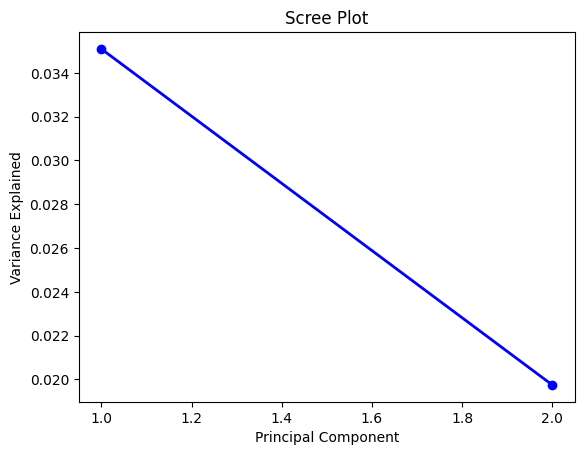

In [ ]:
#Creating a scree plot to visualize the percentage of variation explained by each principal component

PC_values = np.arange(pca.n_components_) + 1
plt.plot(PC_values, pca.explained_variance_ratio_, 'o-', linewidth=2, color='blue')
plt.title('Scree Plot')
plt.xlabel('Principal Component')
plt.ylabel('Variance Explained')
plt.show()

In [ ]:
print(pca.explained_variance_ratio_)


[0.03509269 0.01974829]


In [ ]:
# Creating a new dataframe after applying PCA
ehr_data_pca = pd.DataFrame(ehr_data_pca,columns=['PC1', 'PC2'])
ehr_data_pca.head()

,PC1,PC2
0,43.315467,0.267717
1,-4.136666,-3.408201
2,-3.663770,-2.104583
3,-2.392666,-2.885555
4,-2.266471,-3.876589


<Axes: >

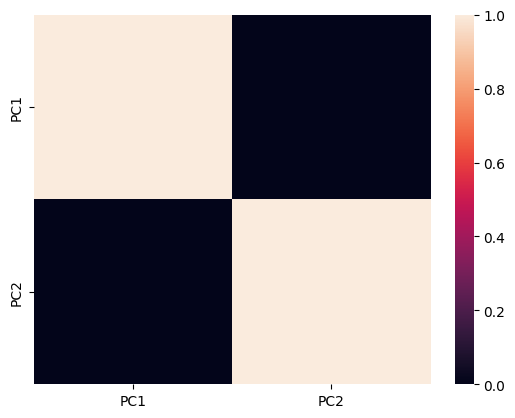

In [ ]:
# Checking for co-relation between features after PCA
sns.heatmap(ehr_data_pca.corr())

In [ ]:
pca.components_


array([[-0.00968039,  0.05352182,  0.12700578, ...,  0.05127277,
        -0.01782587,  0.02466389],
       [ 0.02833063, -0.03739945, -0.07065901, ...,  0.12035921,
         0.02158614, -0.0229381 ]])

In [ ]:
# Represent the effect features on PCA components.
component_df = pd.DataFrame(pca.components_,index=['PCA1', 'PCA2'],columns=ehr_data.columns)
component_df

,bmi,hospital_expire_flag,los,age,charlson,"Calculated Bicarbonate, Whole Blood",Calculated Total CO2,"Chloride, Whole Blood",Free Calcium,Glucose,...,insurance_Medicare,insurance_Other,admission_type_DIRECT EMER.,admission_type_DIRECT OBSERVATION,admission_type_ELECTIVE,admission_type_EU OBSERVATION,admission_type_EW EMER.,admission_type_OBSERVATION ADMIT,admission_type_SURGICAL SAME DAY ADMISSION,admission_type_URGENT
PCA1,-0.009680,0.053522,0.127006,0.015284,0.045391,0.018222,0.082464,0.040290,0.082559,0.058225,...,0.007969,-0.003992,0.003877,-0.016294,0.003373,-0.031025,-0.022799,0.051273,-0.017826,0.024664
PCA2,0.028331,-0.037399,-0.070659,-0.009018,-0.022414,-0.017666,-0.063774,-0.038439,-0.068457,-0.049584,...,-0.020628,0.024320,-0.017386,0.030074,0.002829,0.011708,-0.108610,0.120359,0.021586,-0.022938


<Axes: >

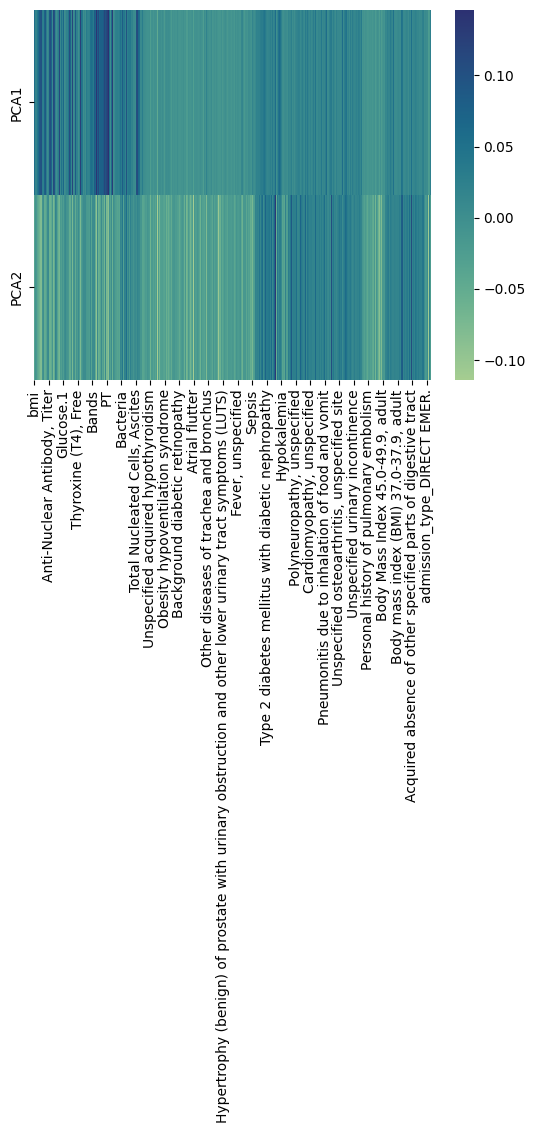

In [ ]:
# Heatmap
sns.heatmap(component_df, cmap="crest")

## Unsupervised Clustering Algorithms

### K-means Clustering

In [ ]:
# Taking numeric data from dataset after applying PCA
X = ehr_data_pca.values

Text(0, 0.5, 'SSE')

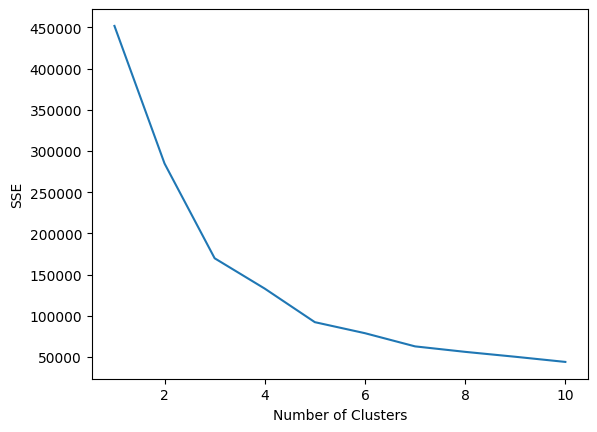

In [ ]:
# Using the elbow method to determine best fit 'k'

numClusters = [1,2,3,4,5,6,7,8,9,10]
SSE = []
for k in numClusters:
    k_means = cluster.KMeans(n_clusters=k)
    k_means.fit(X)
    SSE.append(k_means.inertia_)

plt.plot(numClusters, SSE)
plt.xlabel('Number of Clusters')
plt.ylabel('SSE')

In [ ]:
# Performing the K-Means clustering for n_clusters = 4.

k_means = KMeans(n_clusters = 4)
k_means.fit(ehr_data_pca)

KMeans(n_clusters=4)

In [ ]:
# Displaying for each cluster, values of cluster centers according to the number of columns present in the data.
centroids = k_means.cluster_centers_
# Print the centroids of each cluster
print("Centroids of the clusters:")
print(centroids)

Centroids of the clusters:
[[-2.9478242  -1.62507747]
 [ 1.11478732  3.74671046]
 [17.82271018 -0.78893438]
 [ 2.25791761 -6.82902093]]


In [ ]:
#labels_ Index of the cluster each sample belongs to.
labels = k_means.labels_

#### K-means Clustering Visualization

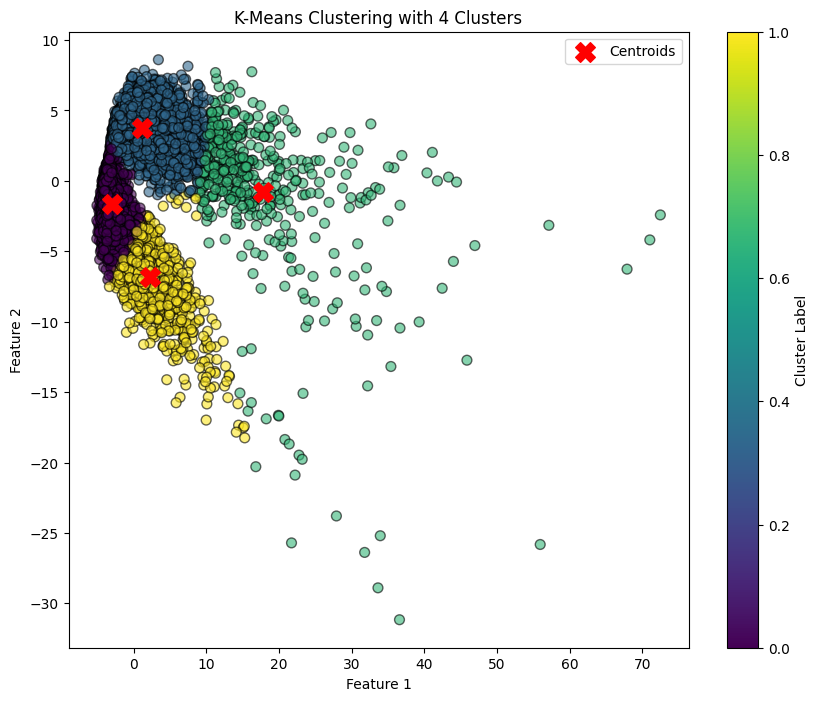

In [ ]:
# Create a scatter plot for the data points
plt.figure(figsize=(10, 8))

plt.scatter(X[:, 0], X[:, 1], c=labels, cmap='viridis', s=50, alpha=0.6, edgecolors='k')

# Plot the centroids of the clusters
plt.scatter(centroids[:, 0], centroids[:, 1], s=200, c='red', marker='X', label='Centroids')

plt.legend()
plt.title("K-Means Clustering with 4 Clusters")
plt.xlabel("Feature 1")
plt.ylabel("Feature 2")
plt.colorbar(label='Cluster Label')

plt.show()


In [ ]:
# Count the number of data points in each cluster
cluster_counts = np.bincount(labels)
print(f"Cluster 0: {cluster_counts[0]} points")
print(f"Cluster 1: {cluster_counts[1]} points")
print(f"Cluster 2: {cluster_counts[2]} points")
print(f"Cluster 3: {cluster_counts[3]} points")

Cluster 0: 5154 points
Cluster 1: 4202 points
Cluster 2: 460 points
Cluster 3: 1025 points


#### K-means Clustering Evaluation

In [ ]:
# Calculating Silhoutte Score

score = silhouette_score(ehr_data_pca, labels)

print('Silhouette Score: %.3f' % score)

Silhouette Score: 0.520


### Density-based Spatial Clustering (DBSCAN)

In [ ]:
# Applying DBSCAN
# Using eps = 6 and min_samples = 3

# Taking numeric data from dataset after applying PCA
X = ehr_data_pca.values

dbscan = DBSCAN(eps = 2, min_samples = 3)
labels = dbscan.fit_predict(X)

#### DBSCAN Visualization

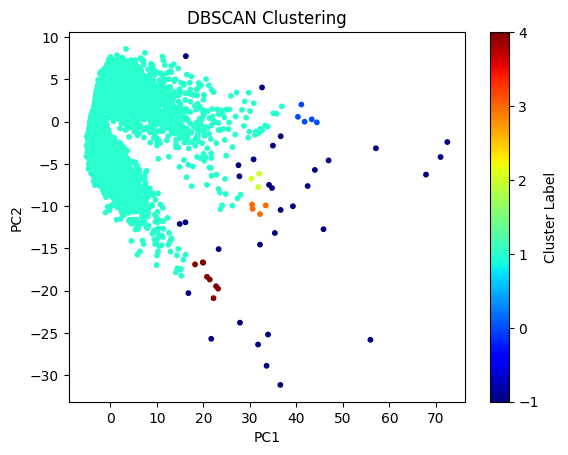

In [ ]:
# Plotting the results
plt.scatter(X[:, 0], X[:, 1], c=labels, cmap='jet', s=10)
plt.title("DBSCAN Clustering")
plt.xlabel("PC1")
plt.ylabel("PC2")
plt.colorbar(label='Cluster Label')
plt.show()

In [ ]:
# Calculating number of clusters found through DBSCAN

labels = dbscan.labels_

# Counting the number of clusters (excluding noise)
n_clusters = len(set(labels)) - (1 if -1 in labels else 0)

# Print the number of clusters
print("Number of clusters:", n_clusters)

Number of clusters: 5


#### DBSCAN Evaluation

In [ ]:
# Calculating Silhoutte Score

dbscan_score = silhouette_score(ehr_data_pca, labels)

print('Silhouette Score: %.3f' % dbscan_score)

Silhouette Score: 0.742


## Interpreting the Results

After conducting unsupervised clustering algorithms, I was able to discover clinically significant subgroups. With K-means clustering, I was able to determine four different clusters. The silhouette score for K-means clustering was 0.52. With DBSCAN, I was able to determine five different clusters. The silhouette score for this algorithm was 0.742 which was higher than the metric score for k-means clustering. For this study the best performing unsupervised clustering algorithm DBSCAN. I believe DBSCAN performed better than k-means clustering because the osa dataset used consisted many patients with a total of 10841. With larger datasets, the data may not be well distributed and could have varying densitites which is better suited for DBSCAN. Also DBSCAN's parameters 'eps' and 'min-samples' can be further tuned to identify either more clustes or less and contribute to a higher metric score.

I believe using unsupervised clustering algorithms have potential implications for patient care and treatment strategies. For instance by identifying clusters, each cluster could have patients with similar traits and symptoms which could lead to developing specialized care and treatment for that cluster of patients. Developing personalized care for patients could ultimately lead to improved outcomes, early detection of symptoms and conditions such as heart failure or sleep apnea, and faster treatment.



## Resources

https://www.geeksforgeeks.org/reduce-data-dimentionality-using-pca-python/

https://www.datacamp.com/tutorial/principal-component-analysis-in-python

https://www.geeksforgeeks.org/kmeans-clustering-and-pca-on-wine-dataset/#

https://scikit-learn.org/dev/modules/generated/sklearn.decomposition.PCA.html

https://seaborn.pydata.org/generated/seaborn.heatmap.html

https://dzone.com/articles/kmeans-silhouette-score-explained-with-python-exam#:~:text=The%20value%20of%20the%20Silhouette,boundary%20of%20the%20neighboring%20clusters.

https://www.geeksforgeeks.org/dbscan-clustering-in-ml-density-based-clustering/

https://www.geeksforgeeks.org/principal-component-analysis-with-python/

https://scikit-learn.org/1.5/modules/unsupervised_reduction.html

https://scikit-learn.org/1.5/auto_examples/decomposition/plot_pca_iris.html#sphx-glr-auto-examples-decomposition-plot-pca-iris-py

https://medium.com/@megha.natarajan/understanding-cumulative-explained-variance-in-pca-with-python-653e3592a77c#:~:text=Cumulative%20Explained%20Variance%20Plot%20Explained&text=Each%20axis%20(principal%20component)%20can,adds%20to%20this%20cumulative%20value.

https://www.statology.org/scree-plot-python/

https://www.geeksforgeeks.org/implementing-dbscan-algorithm-using-sklearn/

